In [130]:
from typing import Callable
from matplotlib.pyplot import subplots, plot
from numpy import linspace, array, copy, pi


def sense(x):
    return x


def simulate(dt, x, u, m=1, g=9.8):
    dx = array([x[3], x[4], x[5], 0, 0, -g])
    x += dt * dx
    if x[2] < 0:
        x[2] = 0
        x[5] = 0
    return x


def create_plot(title: str, xlabel: str, ylabel: str, x: array, plotter: Callable[[float], array], tf: float = 2 * pi,
                dt: float = 0.1) -> (array, array):
    x_log = [copy(x)]
    time = linspace(0., tf, int(tf / dt) + 1)
    for t in time:
        x_log.append(copy(plotter(t)))
    x_log = array(x_log)
    fig, ax = subplots()
    ax.plot(time, x_log[:-1, 2])
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.grid()

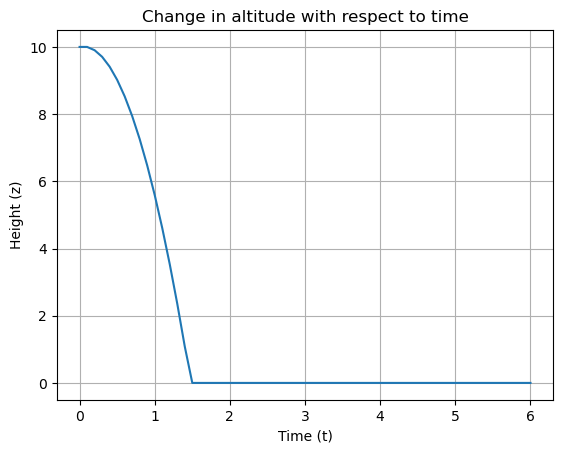

In [131]:
def control(t, y):
    return [0, 0, 0]


tf = 6
dt = 0.1
x = array([0., 0., 10., 0., 0., 0.])


def plotter(t):
    global x
    y = sense(x)
    u = control(t, y)
    x = simulate(dt, x, u)
    return x


create_plot("Change in altitude with respect to time", "Time (t)", "Height (z)", x, plotter, tf, dt)

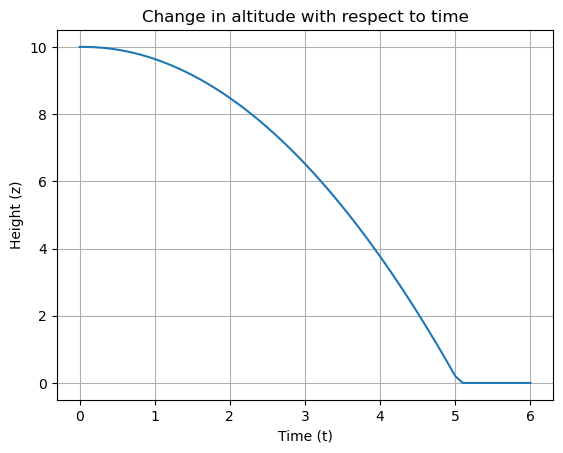

In [132]:
def simulate_with_buoyancy(dt, x, u, m=1, g=9.8, fb=9.0):
    fg = m * g
    net_force = fg - fb
    net_acceleration = net_force / m
    dx = array([x[3], x[4], x[5], 0, 0, -net_acceleration])
    x += dt * dx
    if x[2] < 0:
        x[2] = 0
        x[5] = 0
    return x


tf = 6
dt = 0.1
x = array([0., 0., 10., 0., 0., 0.])


def plotter_with_buoyancy(t):
    global x
    y = sense(x)
    u = control(t, y)
    x = simulate_with_buoyancy(dt, x, u)
    return x


create_plot("Change in altitude with respect to time", "Time (t)", "Height (z)", x, plotter_with_buoyancy, tf, dt)

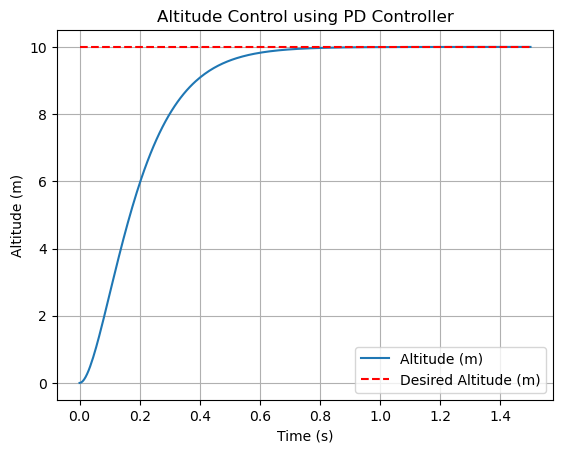

In [133]:
from numpy import linspace
from matplotlib.pyplot import figure, plot, xlabel, ylabel, title, legend, grid, show
from scipy.integrate import solve_ivp

g = 9.8
m = 1.0
z_d = 10
z_dot_d = 0
k_p = 100
k_d = 20


def dynamics(t, z):
    z_pos, z_dot = z
    u = k_p * (z_d - z_pos) + k_d * (z_dot_d - z_dot) + m * g
    z_ddot = (u / m) - g
    return [z_dot, z_ddot]


z0 = [0, 0]

t_span = [0, 1.5]
t_eval = linspace(t_span[0], t_span[1], 300)

sol = solve_ivp(dynamics, t_span, z0, t_eval=t_eval)

figure()
plot(sol.t, sol.y[0], label='Altitude (m)')
plot(sol.t, [z_d] * len(sol.t), 'r--', label='Desired Altitude (m)')
xlabel('Time (s)')
ylabel('Altitude (m)')
title('Altitude Control using PD Controller')
legend()
grid(True)
show()

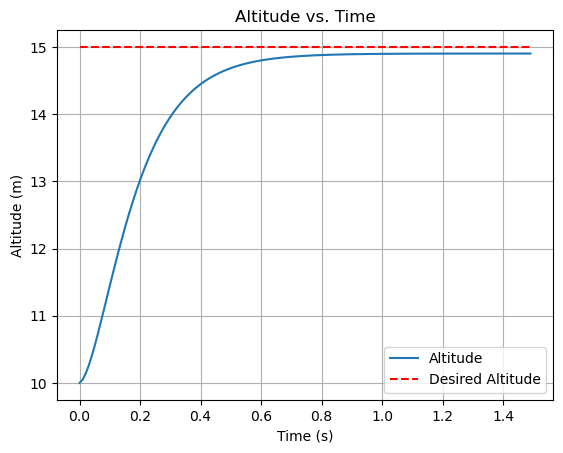

In [134]:
from numpy import linspace
from matplotlib.pyplot import figure, plot, xlabel, ylabel, title, legend, grid, show
from scipy.integrate import solve_ivp

g = 9.8
m_actual = 0.8
m_estimated = 1.0
z_d = 15
z_dot_d = 0
k_p = 100
k_d = 20


def dynamics_corrected_mass(t, z):
    z_pos, z_dot = z

    u = k_p * (z_d - z_pos) + k_d * (z_dot_d - z_dot) + m_estimated * g

    u_corrected = u * (m_estimated / m_actual)
    z_ddot = (u_corrected / m_actual) - g
    return [z_dot, z_ddot]


z0 = [10, 0]

t_span = [0, 2]
t_eval = linspace(t_span[0], t_span[1], 300)

sol_corrected = solve_ivp(dynamics_corrected_mass, t_span, z0, t_eval=t_eval)

figure()
plot(sol_corrected.t, sol_corrected.y[0], label='Altitude (m)')
plot(sol_corrected.t, [z_d] * len(sol_corrected.t), 'r--', label='Desired Altitude (m)')
xlabel('Time (s)')
ylabel('Altitude (m)')
title('Altitude Control with Corrected Mass using PD Controller')
legend()
grid(True)
show()
